## Factory
It is Creational Mehod

#
به ما اجازه میدهد که کی سوپر کلاس بسازیم که مسئول ساختن یک آبجکت هست.
 وبعد به ساب کلاس ها این اجازه رو بدیم
  که بیان نحوه ی ایجاد شدن آن آبجکت را تغییر بدن

#
مثال

برنامه ای بنویسیم که :
که کاربر یک فایل متنی را بهش ارسال میکند 
با توجه به اون فرمتی که دارد
ما اون فایل رو میتونیم تغییر بدیم.
و دحال حاضر دو فرمت زیر را پشتیبانی مینماید:

+ Xml
+ Json

In [2]:
class A:
    def __init__(self,name,format) -> None:
        self.name = name
        self.format = format
       
class B:
    def edit(self,file):
        if file.format =='xml':
            print(f'Editing Xml file .... {file.name}')
        elif file.format == 'json':
            print(f'Editing json file .... {file.name}')
        else:
            raise ValueError('Sorry ...')


## Call class A:

In [3]:
a1 = A('one','xml')
a2 = A('two','json')
a3 = A('three','pdf')

## call class B

In [4]:
b1 = B()

## Edit a1-2-3 object by b1

In [5]:
b1.edit(a1)

Editing Xml file .... one


In [6]:
b1.edit(a2)

Editing json file .... two


In [7]:
b1.edit(a3)

ValueError: Sorry ...

## مشکلات این برنامه
+ اینکه کل پروسه را به دست ایف و اِلس سپرده ایم
+ کل پروسه ادیت کردن را داخل بلاک ایف گذاشتم
+ کارهای متد ادیت خیلی زیاد می شود با رشد برنامه
    + 1 هر فایل را ایف تشخیص دهد
    + 2 یک ادیت رو هر فرمت انجام دهد
    + 3 خطا را تشخیص دهد و چاپ کند

در پایتون هر متد باید فقط و فقط یک کار انجام دهد

## حل مشکل اول بالا
+ ادیت ها را جداگانه نوشته ایم

In [8]:
class B:
    def edit(self,file):
        if file.format == 'json':
             self.json_edit(file)
        if file.format == 'xml':
             self.xml_edit(file)
        else:
            raise ValueError('Sorry ...')


    def json_edit(self,file):
        print(f'Editing json file .... {file.name}')

    def xml_edit(self,file):
        print(f'Editing Xml file .... {file.name}')

## حالا محتویات درون ادیت را میشکنیم به تابع دیگری

In [9]:
## SIMLE FACTORY METHOD

class B2:
#################################################### client
    def edit(self,file):
        edit = self._get_edit(file)
        return edit(file)
#################################################### Creator
    def _get_edit(self,file):
        if file.format == 'json':  # Format Is Identifier
            return self.json_edit
        if file.format == 'xml':
            return self.xml_edit
        else:
            raise ValueError('Sorry ...')
#################################################### Product
    def json_edit(self,file):
        print(f'Editing json file .... {file.name}')

    def xml_edit(self,file):
        print(f'Editing Xml file .... {file.name}')

In [10]:
b2= B2()
b2.edit(a1)

Editing Xml file .... one


## Creational 
### Factory Methods has 3 component :
+ Creator : بخش آخر کد که چیزی را تولید میکنند
    + identifier : چیزی که بر اساس آن کریتور می آید و تصمیم میگیرد که چه آبجکتی را بسازد :
                در مثال بالا فرمت ایدنتیفایر هسست و کریتور براساس آن هر آبجکت را می سازد
+ Product : چه نوع آبجکتی ساخته بشه 
+ Client : بخشی از کد که کاربرها باآن سرکار دارند

In [3]:
from abc import ABC, abstractclassmethod
from math import prod
#--------------------------------------------+
#                   Creator                  |
#--------------------------------------------+
"""
به ازای هر پروداکت یک کریتور می سازیم
یکی برای  json
و یکی برای Xml
"""
class Creator(ABC):
    @abstractclassmethod
    def make(self):
        print('6')
        pass

    def call_edit(self):
        product = self.make()
        result = product.edit()
        print('5')
        return result

class JsonCreator(Creator):
    def make(self):
        print('4')
        return Json()

class XmlCreator(Creator):
    def make(self):
        print('3')
        return Xml()

#--------------------------------------------+
#                   Product                  |
#--------------------------------------------+
"""
اول پروداکت ها را می سازیم 
"""
class Product(ABC):
    @abstractclassmethod
    def edit(self):
        print('2')
        pass    # کار خاصی انجام نمیدهد 
                #فقط میخواهیم ساب کلاس ها را مجبور کنیم که آنرا اورایت کنند 

class Json(Product):
    def edit(self):
        return 'Editing Json File ...'

class Xml(Product):
    def edit(self):
        print('1')
        return 'Editing Xml File ...'

#--------------------------------------------+
#                    Client                  |
#--------------------------------------------+
def Client(format):
    return format.call_edit()


## Run Above Factory Class

In [4]:
print(Client(XmlCreator()))

3
1
5
Editing Xml File ...


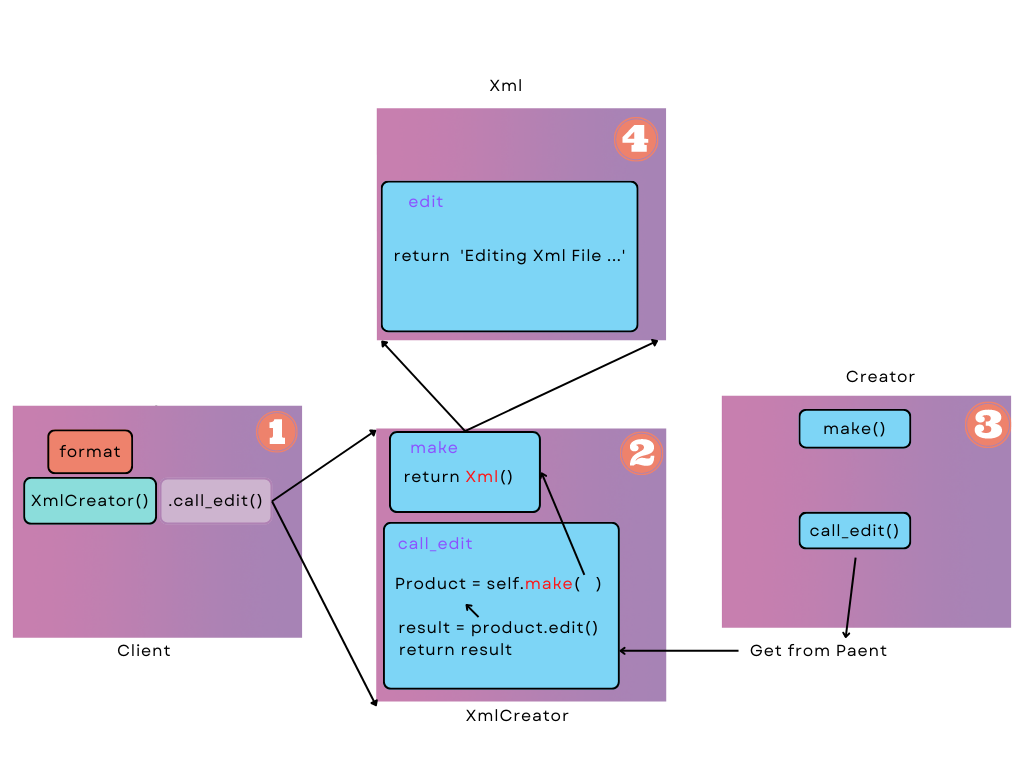